In [19]:
import os 
from fastai import *
from fastai.vision import *
from fastai.vision.transform import *
import numpy as np

In [3]:
train_csv = './data/dataset/train.csv'
test_csv = './data/dataset/test.csv'
train_img = './data/dataset/train'
test_img = './data/dataset/test'

In [4]:
train_df = pd.read_csv(train_csv)

In [8]:
train_df.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [5]:
test_df = pd.read_csv(test_csv)

In [6]:
list_train= os.listdir(train_img)

In [9]:
np.random.seed(42)

src = (ImageList.from_df(train_df, path=train_img)
      .split_by_rand_pct(valid_pct=0.2)
      .label_from_df(cols='target')
      )

In [10]:
src

LabelLists;

Train: LabelList (292 items)
x: ImageList
Image (3, 183, 276),Image (3, 444, 330),Image (3, 190, 266),Image (3, 275, 184),Image (3, 264, 191)
y: CategoryList
bharatanatyam,odissi,odissi,sattriya,kuchipudi
Path: data/dataset/train;

Valid: LabelList (72 items)
x: ImageList
Image (3, 243, 207),Image (3, 749, 1200),Image (3, 275, 183),Image (3, 236, 220),Image (3, 151, 216)
y: CategoryList
odissi,sattriya,odissi,kathak,manipuri
Path: data/dataset/train;

Test: None

In [21]:
# zc = zoom_crop(scale=(0.75,2), do_rand=True)


In [24]:
tfms = get_transforms(do_flip=True, max_zoom=1.4  )

In [45]:
data = (src.transform(tfms= tfms, size=224)
       .databunch().normalize(imagenet_stats))

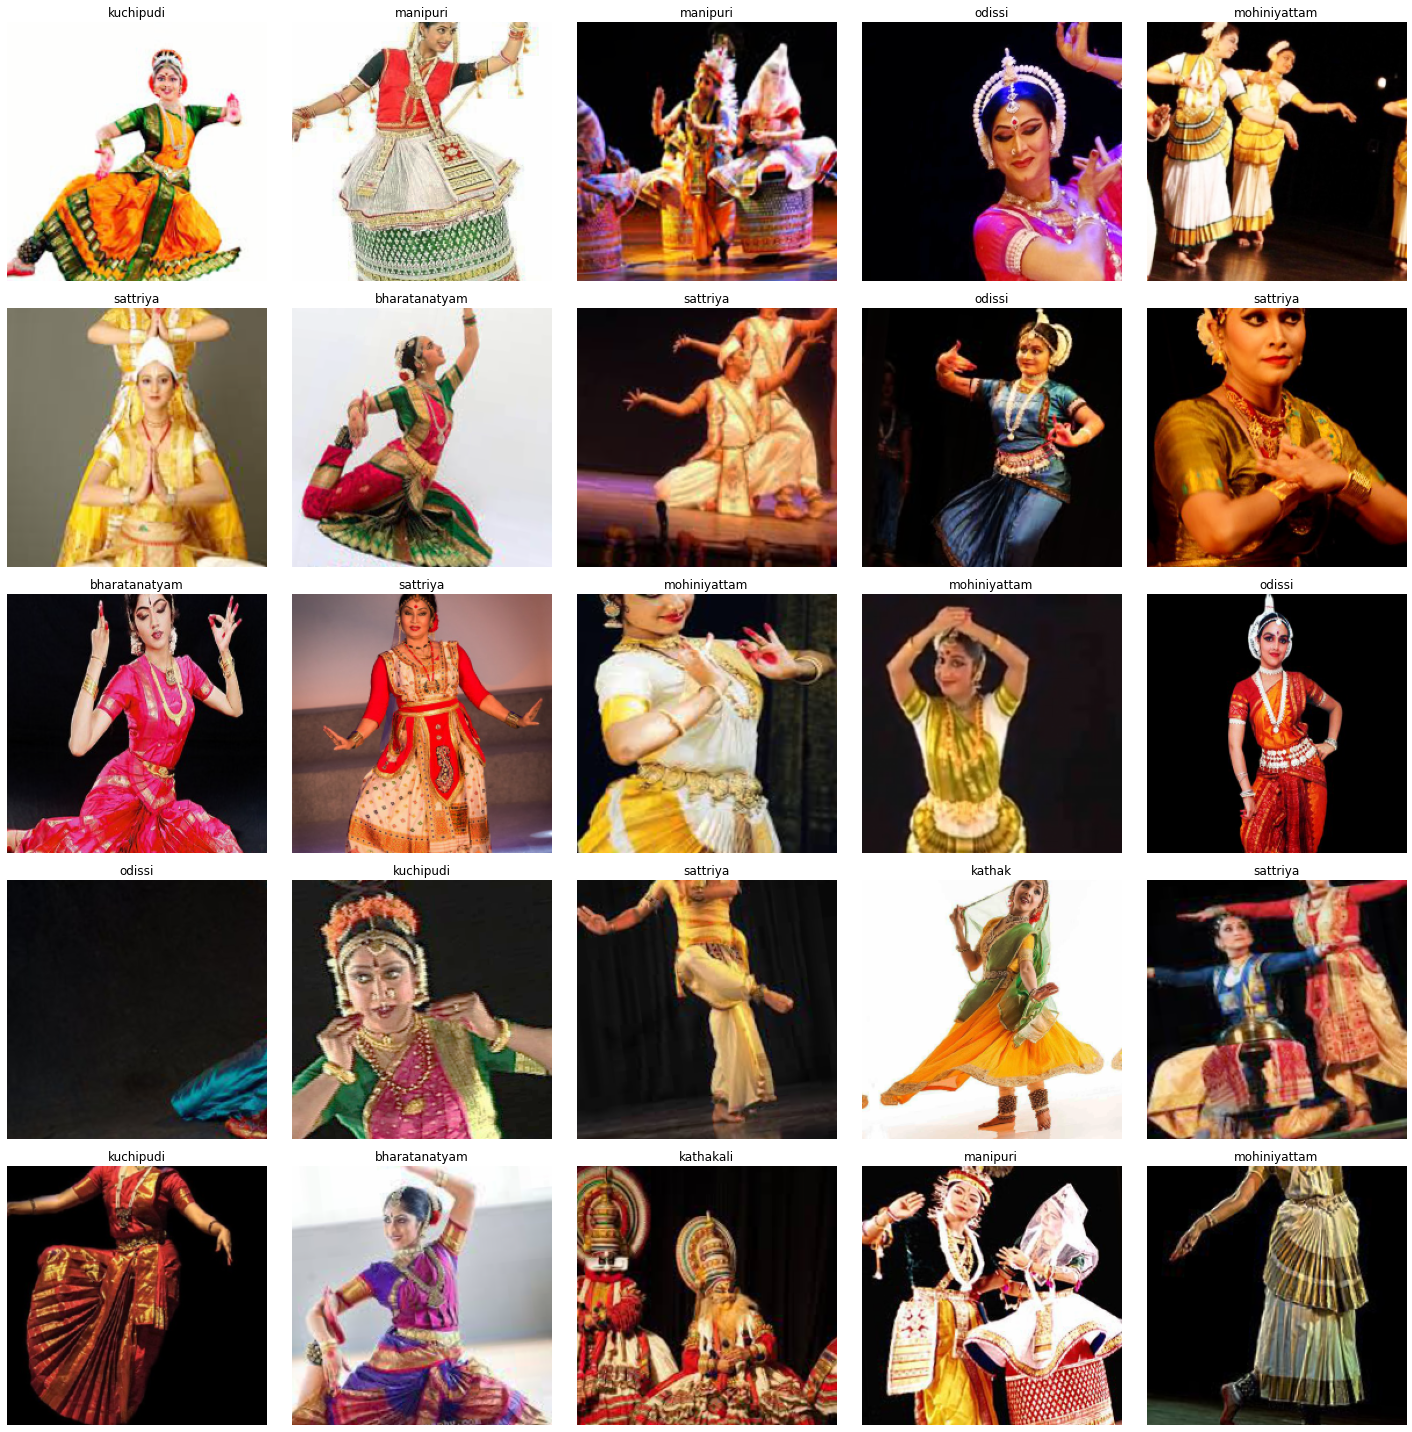

In [46]:
data.show_batch()

In [47]:
learn = cnn_learner(data, models.resnet50, metrics= [metrics.FBeta(beta=1, average='weighted'), accuracy])

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


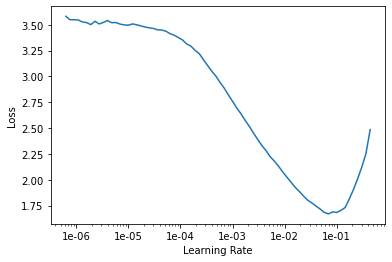

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(4, 1e-02)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,2.751965,3.694370,0.506931,0.569444,00:05
1,2.007339,4.892176,0.412422,0.416667,00:05
2,1.658971,2.456570,0.571840,0.583333,00:05
3,1.402285,1.518741,0.649401,0.652778,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


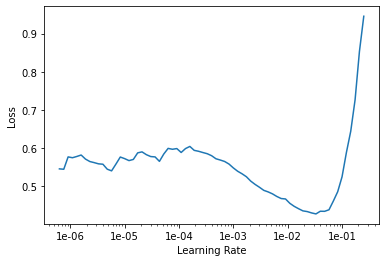

In [52]:
learn.lr_find()
learn.recorder.plot()

In [53]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


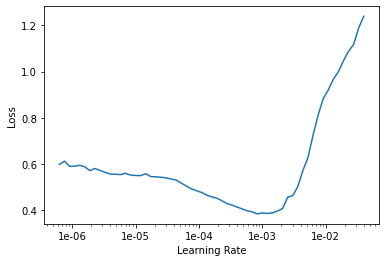

In [54]:
learn.lr_find()
learn.recorder.plot()

In [55]:
learn.fit_one_cycle(4, slice(1e-4))

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.648579,1.138138,0.684921,0.694444,00:05
1,0.541566,0.965776,0.757623,0.763889,00:05
2,0.528435,0.901688,0.793237,0.791667,00:05
3,0.463988,0.892917,0.808306,0.805556,00:05


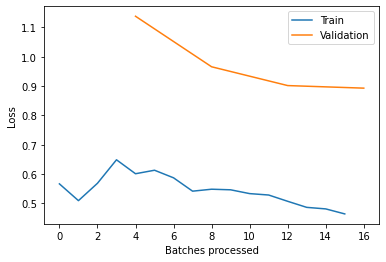

In [56]:
learn.recorder.plot_losses()